In [3]:
#import Modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [24]:
#initiate lists and load data
data1 = []
data2 = []

for i in range(1,9):
    data=np.load(f'times{i}.npy', allow_pickle=True)
    time_mean = np.mean(data,axis=1)
    data1.append(time_mean)
    
    data=np.load(f'timesSUMO{i}.npy', allow_pickle=True)
    time_mean = np.mean(data,axis=1)
    data2.append(time_mean)
    


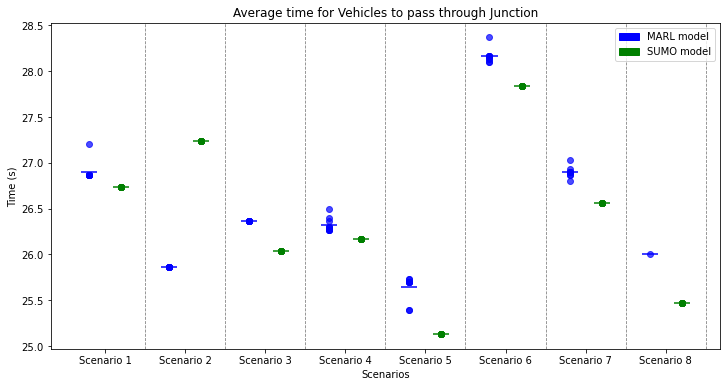

In [25]:
#create figure
fig, ax = plt.subplots(figsize=(12, 6))

#positions for x axis
x_positions = np.arange(1, 9)

#offset, lables and colour for each set of data
offsets = [-0.2, 0.2]
colors=['blue','green']
labels = ['MARL model','SUMO model']


for i, data in enumerate([data1, data2]):
    for j in range(8):
        #scatter plot each scenario for each set of data
        ax.scatter(np.full_like(data[j], x_positions[j] + offsets[i]), data[j], alpha=0.7,color=colors[i])

        #plot mean
        mean_value = np.mean(data[j])
        ax.hlines(y=mean_value, xmin=x_positions[j] + offsets[i] - 0.1, xmax=x_positions[j] + offsets[i] + 0.1, color=colors[i])

#verticle lines for clarity
for x in x_positions:
    ax.axvline(x=x + 0.5, color='gray', linestyle='--', linewidth=0.8)
    
#sorting x axis
ax.set_xticks(x_positions)
ax.set_xticklabels([f'Scenario {i+1}' for i in range(8)])

#sorting labels
ax.set_xlabel('Scenarios')
ax.set_ylabel('Time (s)')
ax.set_title('Average time for Vehicles to pass through Junction')

#legend
legend_handles = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
ax.legend(handles=legend_handles, loc='upper right')

#save or show
#plt.show()
plt.savefig('Times.png')

In [22]:
#initiate lists and load data
data1=[]
data2=[]
data3=[]
data4=[]
for i in range(1,9):
    data = np.load(f'FVtoLV{i}.npy', allow_pickle=True)
    data1_mean = np.min(data,axis=1)
    data1.append(data1_mean)
    
    data= np.load(f'LVtoRV{i}.npy', allow_pickle=True)
    data3_mean = np.min(data,axis=1)
    data3.append(data3_mean)
    
    data = np.load(f'FVtoLVSUMO{i}.npy', allow_pickle=True)
    data2_mean = np.min(data,axis=1)
    data2.append(data2_mean)
    
    data= np.load(f'LVtoRVSUMO{i}.npy', allow_pickle=True)
    data4_mean = np.min(data,axis=1)
    data4.append(data4_mean)
    

    
    


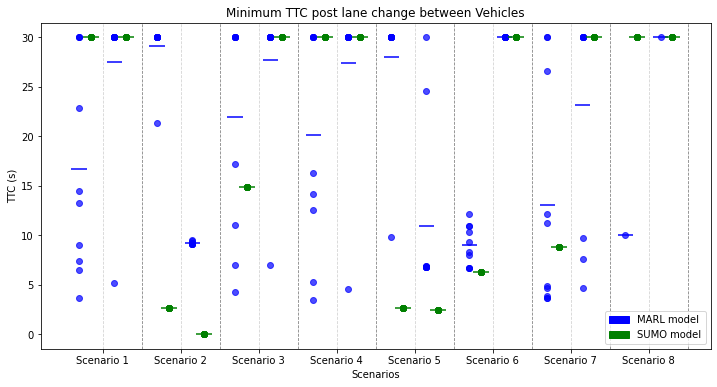

In [23]:
#create figure
fig, ax = plt.subplots(figsize=(12, 6))

#create x axis positions
x_positions = np.arange(1, 9)

#offset positions for each set of data and associated colours
offsets = [-0.3,-0.15,0.15, 0.3]
colors = ['blue','green','blue', 'green']

#plot data sets
for i, data in enumerate([data1, data2,data3,data4]):
    for j in range(8):
        #scatter plot each scenario and set of data
        ax.scatter(np.full_like(data[j], x_positions[j] + offsets[i]), data[j], alpha=0.7,color=colors[i])

        #plot mean
        mean_value = np.mean(data[j])
        ax.hlines(y=mean_value, xmin=x_positions[j] + offsets[i] - 0.1, xmax=x_positions[j] + offsets[i] + 0.1, color=colors[i])

#verticle lines for clarity
for x in x_positions:
    ax.axvline(x=x + 0.5, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(x, color='lightgray', linestyle='--', linewidth=0.8)
    
#sorting x axis
ax.set_xticks(x_positions)
ax.set_xticklabels([f'Scenario {i+1}' for i in range(8)])

#setting labels
ax.set_xlabel('Scenarios')
ax.set_ylabel('TTC (s)')
ax.set_title('Minimum TTC post lane change between Vehicles')

#legend
legend_handles = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
ax.legend(handles=legend_handles, loc='lower right')

#save or show
#plt.show()
plt.savefig('TTC.png')